# deskripsi library yang digunakan

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [26]:
df = pd.read_csv('fastfood.csv')

## 1. BUSINESS UNDERSTANDING

Pada tahap ini membutuhkan pengetahuan dari objek bisnis, bagaimana membangun atau mendapatkan data, dan bagaimana untuk menentukan dan mencocokan tujuan pemodelan dengan jelas secara keseluruhan, menerjemahkan tujuan tersebut serta menentukan pembatasan dalam perumusan masalah data mining, dan selanjutnya mempersiapkan strategi awal untuk mencapai tujuan tersebut sehingga model terbaik dapat dibangun.

1. Problem 

Makanan cepat saji di beberapa restoran memiliki berbagai macam menu yang berbeda-beda, dan tentunya banyak memicu terjadinya kolesterol jika di konsumsi secara berlebihan. Sehingga apakah mengkonsumsi menu makanan cepat saji tanpa mengetahui dan menghitung jumlah asupan gizi seperti kalori, lemak, gula dan protein sesuai dengan kebutuhan tubuh dapat mempengaruhi kadar kolesterol darah total dalam tubuh. Karena pada dasarnya, jika mengkonsumsi karbohidrat, lemak, gula dan protein secara berlebih cenderung meningkatkan kadar LDL, trigliserida dan menurunkan kadar HDL yang dapat menyebabkan terjadinya penyakit stroke, diabetes, dan lainnya. 
Maka dari itu, Restoran Makanan cepat Saji melakukan penelitian dan riset dengan pakar kesehatan untuk mencantumkan komposisi dari makanan yang mereka buat agar pelanggan mengetahui asupan gizi seimbang yang akan dikonsumsi.

2. Tujuan

Dataset yang di ambil dari kaggle ini (https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition) bertujuan untuk menganalisis dan mengetahui estimasi jumlah kandungan kolestrol dari Menu Makanan Cepat Saji di beberapa Restoran, agar pelanggan dapat lebih memahami kandungan gizi bagi tubuhnya dan dapat membuat keputusan untuk asupan gizi makanan yang akan pelanggan beli, serta dapat membantu pelanggan mengelola kesehatan dengan lebih baik.

# 2. DATA UNDERSTANDING

Tahap ini memberikan fondasi analitik untuk sebuah penelitian dengan membuat ringkasaan (summary) dan mengidentifikasi potensi masalah dalam data. Tahap ini juga harus dilakukan secara cermat dan tidak terburu-buru, seperti pada visualisasi data, yang terkadang insight-nya sangat sulit didapat dika dihubungkan dengan summary data nya. Jika ada masalah pada tahap ini yang belum terjawab, maka akan menggangu pada tahap modeling.

Dari pengumpulan data yang telah diambil mengenai Kandungan Gizi Menu Restoran Wendy's, terdapat 9 kolom yang berisi 2 kolom objek dan 7 kolom integer. Jika menggunakan regresi linear, maka hanya kolom yang berisi float saja yang bisa diolah. Berikut atribut-atribut nya :

0. restaurant = objek
1. menu = objek
2. calories (Kalori) = int
3. total_fat (Lemak) = int
4. cholesterol (Kolestrol) = int
5. sodium (Sodium) = int
6. total_Carb (Total karbohidrat) = int
7. sugar  (Gula) = int
8. protein (Protein) = int

# Deskripsi Dataset

In [27]:
df.head(7)

,restaurant,menu,calories,total_fat,cholesterol,sodium,total_carb,sugar,protein
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,7,95,1110,44,11,37
1,Mcdonalds,Single Bacon Smokehouse Burger,840,45,130,1580,62,18,46
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,67,220,1920,63,18,70
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,31,155,1940,62,18,55
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,45,120,1980,81,18,46
5,Mcdonalds,Big Mac,540,28,80,950,46,9,25
6,Mcdonalds,Cheeseburger,300,12,40,680,33,7,15


# DATA PREPARATION

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   restaurant   89 non-null     object
 1   menu         89 non-null     object
 2   calories     89 non-null     int64 
 3   total_fat    89 non-null     int64 
 4   cholesterol  89 non-null     int64 
 5   sodium       89 non-null     int64 
 6   total_carb   89 non-null     int64 
 7   sugar        89 non-null     int64 
 8   protein      89 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 6.4+ KB


<AxesSubplot:>

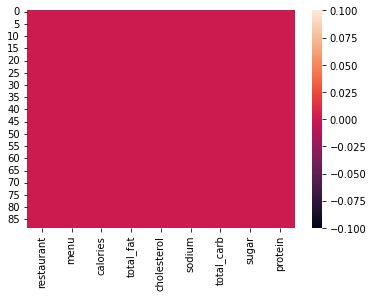

In [29]:
sns.heatmap(df.isnull())

In [30]:
df.describe()

,calories,total_fat,cholesterol,sodium,total_carb,sugar,protein
count,89.000000,89.00000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,554.606742,26.88764,98.202247,1313.932584,42.000000,8.651685,36.730337
std,369.880374,21.84628,70.679523,936.289361,25.612053,11.313810,25.845592
min,70.000000,2.00000,0.000000,20.000000,1.000000,0.000000,7.000000
25%,350.000000,13.00000,60.000000,790.000000,27.000000,3.000000,25.000000
50%,490.000000,22.00000,85.000000,1110.000000,41.000000,7.000000,32.000000
75%,680.000000,34.00000,110.000000,1580.000000,55.000000,11.000000,39.000000
max,2430.000000,141.00000,475.000000,6080.000000,156.000000,87.000000,186.000000


# Visualisasi Data

<AxesSubplot:>

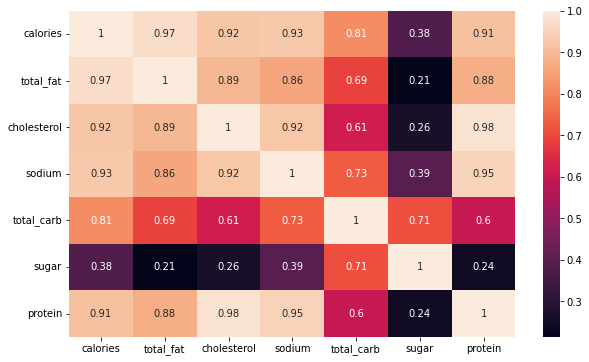

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

# Jumlah Kandungan Kolesterol berdasarkan Menu Makanan

In [32]:
models = df.groupby('menu').count()[['total_fat']].sort_values(by='total_fat',ascending=True).reset_index()
models = models.rename(columns={'total_fat':'cholesterol'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]),
 [Text(0, 0, '1 Piece Chick-n-Strips'),
  Text(1, 0, 'Lobster Roll'),
  Text(2, 0, 'Jr. Deluxe Burger'),
  Text(3, 0, 'Jr. Chili Cheeseburger'),
  Text(4, 0, 'Jr. Burger'),
  Text(5, 0, 'Jalapeno Burger'),
  Text(6, 0, 'Hatch Green Chile Cheeseburger'),
  Text(7, 0, 'Hamburger'),
  Text(8, 0, 'Grilled Sweet BBQ Bacon Chicken Sandwich'),
  Text(9, 0, 'Maple Bacon Dijon 1/4 lb Burger'),
  Text(10, 0, 'Grilled Signature Sriracha Chicken Sandwich'),
  Text(11, 0, 'Grilled Maple Bacon Dijon Chicken Sandwich'),
  Text(12, 0, 'Grilled Garlic White Cheddar Chicken Sandwich'),
  Text(13, 0, 'Gril

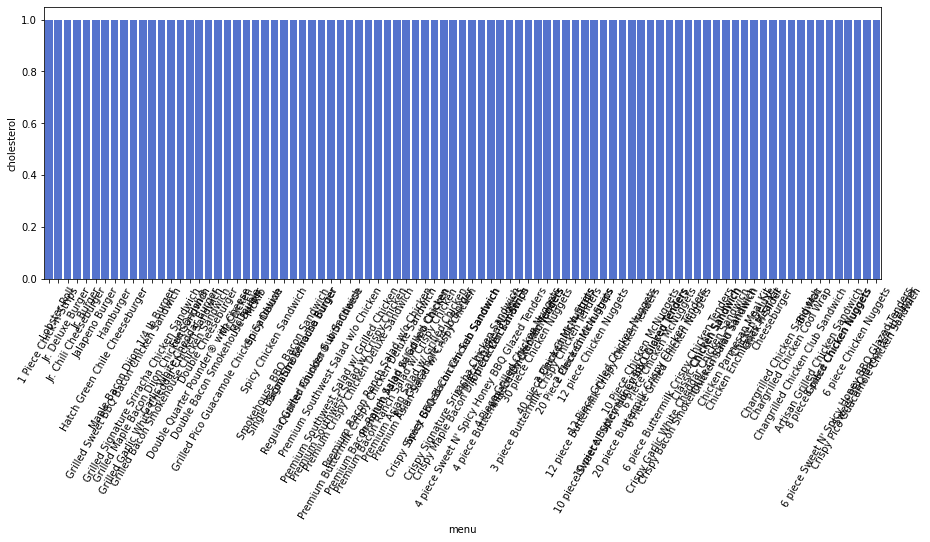

In [33]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['menu'], y=models['cholesterol'], color='royalblue')
plt.xticks(rotation=60)

# MODELLING DATA

# seleksi fitur

In [35]:
features = ['calories','total_carb','sugar','protein','total_fat']
x = df[features]
y = df['cholesterol']
x.shape, y.shape

((89, 5), (89,))

# split data training dan data testing

In [36]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(23,)

# membuat model regresi linier

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

# EVALUATION DATA

In [38]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9783371357986096


# membuat inputan model regresi linier

In [40]:
#calories=300, total_carb=33, sugar=7 , protein=15 , total_fat=12
input_data = np.array([[300, 33, 7, 15, 12]])

prediction = lr.predict(input_data)
print('Estimasi Jumlah Kolesterol Menu Makanan :', prediction)

Estimasi Jumlah Kolesterol Menu Makanan : [39.77675365]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

# save model

In [41]:
import pickle

filename = 'estimasi_fastfood.sav'
pickle.dump(lr,open(filename,'wb'))